<a href="https://colab.research.google.com/github/heatherp4rk/DATAANALYSIS/blob/main/Dataanalysis_w4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. 회귀모델 만들기

## 5.1.1 사이킷런의 분류와 회귀

지도학습 (정답이 있는)
* Classification
    * 카테고리 데이터로 답을 정할 때 사용
    * 예) 당뇨병인지 아닌지 여부 판단
* Regression
    * 연속된 수치 데이터 예측

비지도학습 (정답이 없는)
* Clustering
    * 비슷한 데이터를 모아줌
* Dimensionality reduction
    * feature가 너무 많아서 도움이 안 될 때
    * 시각화할 때

## 5.1.2 인슐린 수치를 회귀로 예측하기 위해 데이터셋 나누기

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../diabetes.csv')
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# label 값을 기준으로 학습, 예측 데이터셋 나누기
# 학습 세트가 더 많아야지 예측의 결과가 잘 나옴

(df["Insulin"] > 0).value_counts()

,count
Insulin,
True,394
False,374


In [9]:
train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [10]:
test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

**EDA**

/tmp/ipython-input-1491181672.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

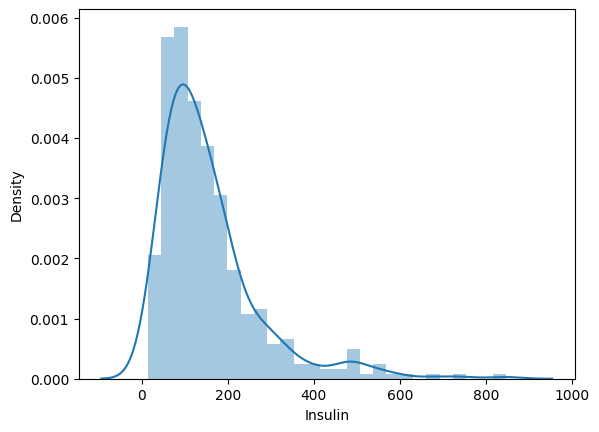

In [11]:
sns.distplot(train["Insulin"])

<Axes: ylabel='Insulin'>

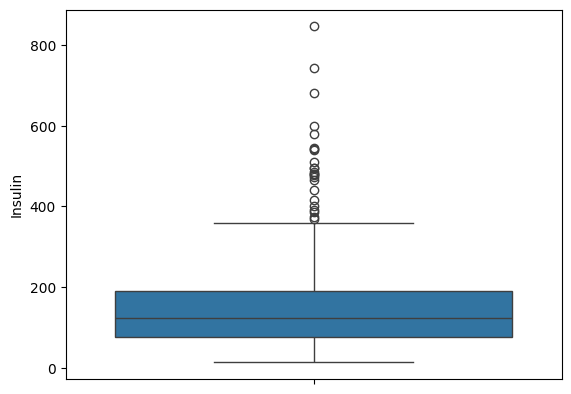

In [12]:
sns.boxplot(train["Insulin"])

In [13]:
desc = train["Insulin"].describe()
desc

,Insulin
count,394.000000
mean,155.548223
std,118.775855
min,14.000000
25%,76.250000
50%,125.000000
75%,190.000000
max,846.000000


In [14]:
# IQR : 3IQR - 1IQR
# OUT > 3IAR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [15]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [16]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(394, 9)


(370, 9)

In [17]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [18]:
label_name = "Insulin"
label_name

'Insulin'

In [19]:
X_train = train[feature_names]
X_train.shape

(370, 8)

In [20]:
y_train = train[label_name]
y_train.shape

(370,)

In [21]:
X_test = test[feature_names]
X_test.shape

(374, 8)

In [22]:
y_test = test[label_name]
y_test.shape

(374,)

## 5.1.3 크로스 밸리데이션으로 모델 검증하기

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42)]

In [84]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([22, 27, 27, 18, 18,  8, 29, 10, 23, 21])

In [85]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.69538436, 0.41374935, 0.93985074, 0.48930572, 0.34475237,
       0.81950979, 0.85573017, 0.4714825 , 0.61607923, 0.91793116])

In [86]:
results = []
for estimator in estimators:
    result = [ ]
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [87]:
#n_iter의 수를 늘릴 수록 정확도 좋음
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = [ ]

    max_depth = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)

    param_distributions = {"max_depth":max_depth, "max_features":max_features };
    regressor = RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, n_jobs=None, cv=5, verbose=2, random_state=42)

    regressor.fit(X_train, y_train)

    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .....max_depth=19, max_features=0.44949658736095427; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7834636017206147; total time=   0.0s
[CV] END .......max_depth=8, max_features=0.7834

In [88]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]

In [89]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(max_depth=np.int64(5),
                      max_features=np.float64(0.9567498576286477),
                      random_state=42)

In [28]:
# regressor.best_params_

{'max_features': np.float64(0.7688598201524499), 'max_depth': np.int64(7)}

In [29]:
# regressor.best_estimator_

DecisionTreeRegressor(max_depth=np.int64(7),
                      max_features=np.float64(0.7688598201524499),
                      random_state=42)

In [30]:
# regressor.best_score_

np.float64(0.04097328541394307)

In [31]:
# regressor.cv_results_

{'mean_fit_time': array([0.0039319 , 0.00377088, 0.00295124, 0.00441923, 0.00319371,
        0.00332918, 0.00341206, 0.00326724, 0.00301008, 0.00323534]),
 'std_fit_time': array([8.00745253e-04, 1.01123131e-03, 5.44851088e-05, 4.84581656e-04,
        2.48512230e-05, 1.01706761e-04, 1.46368069e-04, 3.38487632e-04,
        5.12415609e-05, 2.09495571e-04]),
 'mean_score_time': array([0.00241499, 0.00183239, 0.00161557, 0.00174069, 0.00161772,
        0.00169859, 0.0017909 , 0.00193558, 0.00166645, 0.00199623]),
 'std_score_time': array([8.62583782e-04, 3.31477788e-04, 1.50807243e-05, 8.64478283e-05,
        2.88517611e-05, 1.12334334e-04, 1.36660032e-04, 5.64092808e-04,
        6.19773854e-05, 3.77831316e-04]),
 'param_max_features': masked_array(data=[0.42703813608553715, 0.42703813608553715,
                    0.34261318037807903, 0.9985355984430972,
                    0.45072146802476687, 0.7688598201524499,
                    0.48737536655310204, 0.34261318037807903,
              

In [90]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=np.int64(5),
                      max_features=np.float64(0.9567498576286477),
                      random_state=42)

In [91]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([ 25., 182.,  55., 144., 220.])

In [92]:
# 정답을 정확하게 맞춘 갯수
(y_predict == y_train).sum()

np.int64(7)

<Axes: xlabel='Insulin'>

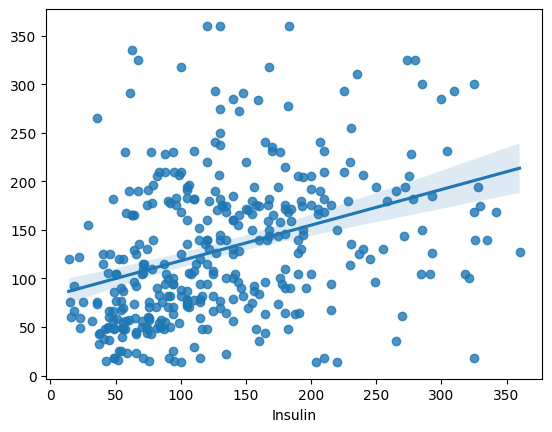

In [93]:
# regplot으로 결과 값 비교

sns.regplot(x=y_train, y=y_predict)

In [94]:
# 회귀선의 값 -> 1에 가까워야 데이터를 알맞게 예측한 것임
from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

-0.28551906710833275

/tmp/ipython-input-3133357802.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label="trian");
/tmp/ipython-input-3133357802.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict, hist=False, label="predict")


<Axes: xlabel='Insulin', ylabel='Density'>

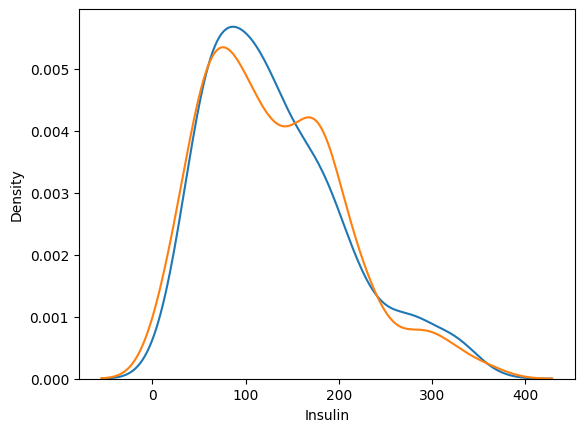

In [95]:
# distplot으로 정답값과 예측값의 분포 그리기

sns.distplot(y_train, hist=False, label="trian");
sns.distplot(y_predict, hist=False, label="predict")

## 5.1.4 오차값 MAE,RMSE 구하기

In [96]:
# MAE

error = abs(y_train - y_predict)
error.mean()

np.float64(62.056756756756755)

/tmp/ipython-input-3663185744.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Insulin', ylabel='Density'>

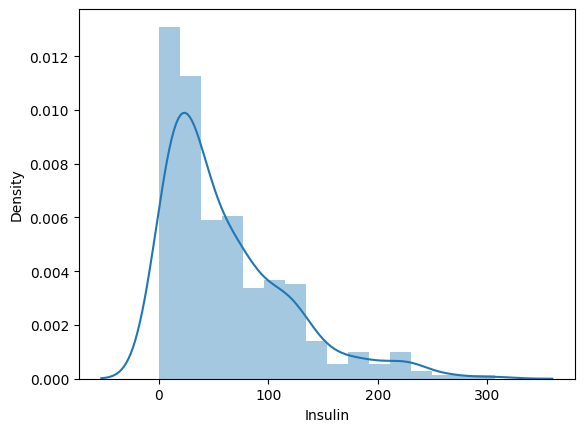

In [97]:
# RMSE

sns.distplot(error)

In [98]:
error.describe()

,Insulin
count,370.000000
mean,62.056757
std,56.854443
min,0.000000
25%,19.250000
50%,42.500000
75%,89.750000
max,307.000000


In [99]:
# RMSE; 제곱 -> 평균 -> 루트 : 실제값과 예측값이 얼마나 떨어져 있는지

np.sqrt(((y_train - y_predict) ** 2).mean())

np.float64(84.11142866717003)

## 5.1.4 회귀로 학습한 결과를 시각화 하기

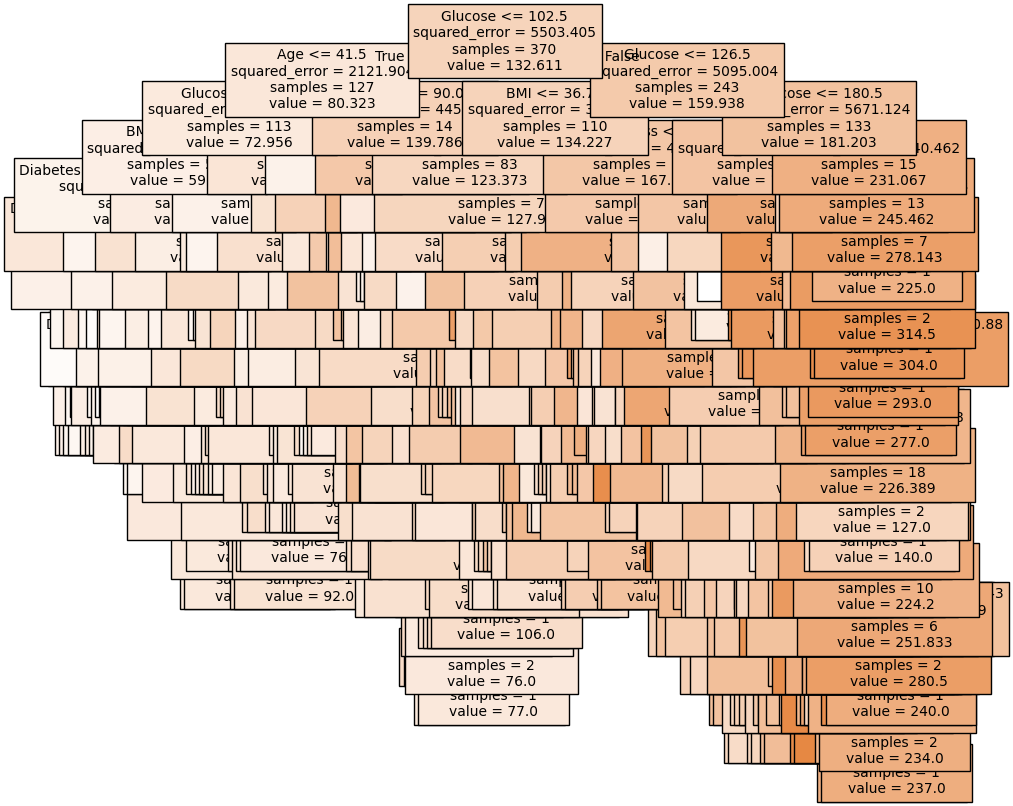

In [100]:
# from sklearn.tree import plot_tree

#plt.figure(figsize=(10, 10))
#tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

In [43]:
model.feature_importances_

array([0.04858345, 0.44656558, 0.07097731, 0.05588694, 0.16087336,
       0.09607089, 0.11025783, 0.01078464])

<Axes: >

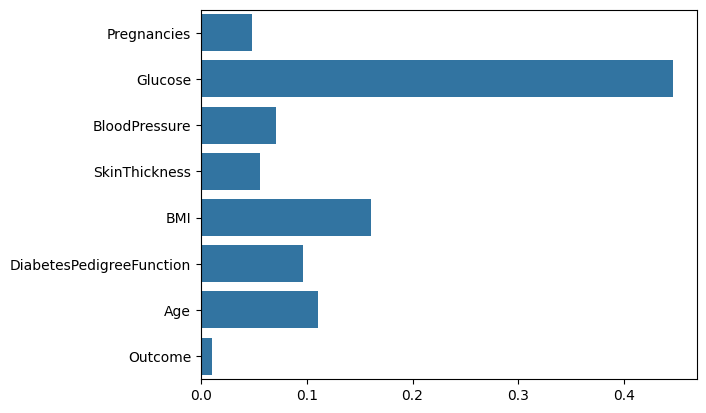

In [101]:
sns.barplot(x=model.feature_importances_, y=feature_names)

## 5.1.6 예측의 결과값 분석하기

In [102]:
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 130., 215., 165.])

In [103]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [104]:
test["Insulin"] = y_test

In [105]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,124.906780,80.878263,18.0,64.00,97.5,155.0,335.0
1,138.0,163.724638,83.718835,14.0,96.75,145.0,215.0,328.0


<Axes: xlabel='Outcome', ylabel='Insulin'>

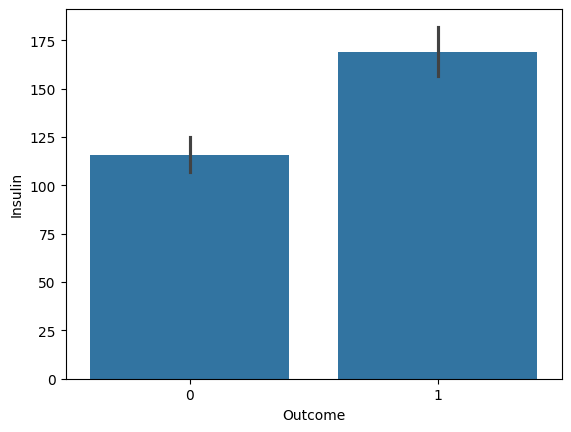

In [106]:
sns.barplot(data=train, x="Outcome", y="Insulin")

<Axes: xlabel='Outcome', ylabel='Insulin'>

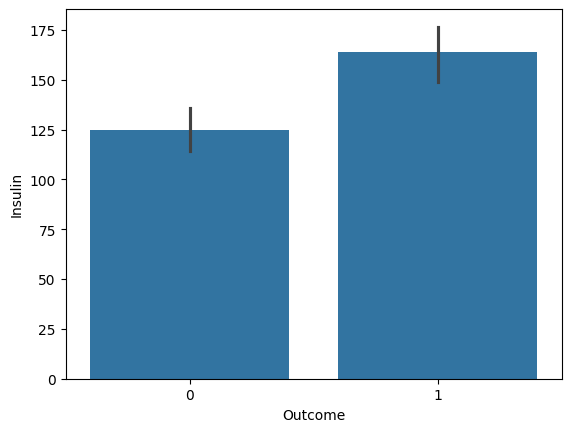

In [107]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")

## 5.1.7 이상치 제거하기

In [51]:
# EDA -> 이상치 제거하기
# MAE, RMSE 모두 줄어듦

## 5.1.8 RandomizedSearchCV로 최적의 파라메터 값 찾기

In [52]:
# from sklearn.model_selection import RandomizedSearchCV

## 5.1.9 RandomizedSearchCV로 최적의 모델 찾기

In [ ]:
# iteration 돌린 값을 regressor에 담고 있으므로 regressor_best_params를 append

# 가장 성능이 좋은 모델 출력 -> best_estimator
# -> cross_validation으로 오차 측정

## 5.1.10 csv 파일로 예측결과 저장하기

In [112]:
df.loc[df["Insulin"] == 0, "Insulin"]

,Insulin
0,0
1,0
2,0
5,0
7,0
...,...
761,0
762,0
764,0
766,0


In [114]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

In [115]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,168,33.6,0.627,50,1
1,1,85,66,29,37,26.6,0.351,31,0
2,8,183,64,0,130,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,325,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,22,30.1,0.349,47,1


In [120]:
df.to_csv("../diatabetes_fill_insulin.csv", index=False)

In [121]:
pd.read_csv("../diatabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,168,33.6,0.627,50,1
1,1,85,66,29,37,26.6,0.351,31,0
2,8,183,64,0,130,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,325,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,22,30.1,0.349,47,1


## 5.2.1 회귀로 예측한 인슐린을 분류에 사용하기

In [124]:
df_insulin = pd.read_csv("../diatabetes_fill_insulin.csv")
df["Insulin"] = df_insulin["Insulin"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,168,33.6,0.627,50,1
1,1,85,66,29,37,26.6,0.351,31,0
2,8,183,64,0,130,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [130]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
        'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Insulin']]

X.shape

(768, 8)

In [133]:
y = df['Outcome']
y.shape

(768,)

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [138]:
X_test.shape, y_test.shape

((154, 8), (154,))

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42)]

In [140]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([24, 27,  6, 15, 19, 23, 25, 12, 17,  7])

In [142]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.67252666, 0.95496946, 0.57310647, 0.79868318, 0.72474758,
       0.59851703, 0.55631999, 0.55468089, 0.87424658, 0.85762245])

In [143]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeRegressor',
  {'max_features': np.float64(0.7834636017206147), 'max_depth': np.int64(8)},
  DecisionTreeRegressor(max_depth=np.int64(8),
                        max_features=np.float64(0.7834636017206147),
                        random_state=42),
  np.float64(-0.08054001494713872),
  {'mean_fit_time': array([0.00371189, 0.00332751, 0.00358272, 0.00394454, 0.0033556 ,
          0.00358715, 0.0035861 , 0.00431304, 0.0045053 , 0.00528512]),
   'std_fit_time': array([6.93393871e-04, 8.06171592e-05, 1.26089667e-04, 6.02882476e-05,
          9.27691072e-05, 1.07000558e-04, 2.50256861e-04, 3.68986422e-04,
          6.46939043e-04, 5.61619781e-04]),
   'mean_score_time': array([0.00205884, 0.0017487 , 0.00189233, 0.00171828, 0.00169144,
          0.00171847, 0.00174713, 0.00183859, 0.00208702, 0.00255809]),
   'std_score_time': array([6.47943459e-04, 1.32031086e-04, 3.41010820e-04, 1.66621396e-04,
          2.65571329e-05, 4.54251906e-05, 7.60627761e-05, 2.14847002e-04,
       

In [146]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth":max_depth, "max_features":max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)

    clf = RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring="accuracy", n_jobs=1, cv=5, verbose=2, random_state=42)

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_estimator_)
    result.append(clf.best_score_)
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......max_depth=13, max_features=0.7073314598128735; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.7073314598128735; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.7073314598128735; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.7073314598128735; total time=   0.0s
[CV] END ......max_depth=13, max_features=0.7073314598128735; total time=   0.0s
[CV] END .......max_depth=3, max_features=0.7073314598128735; total time=   0.0s
[CV] END .......max_depth=3, max_features=0.7073314598128735; total time=   0.0s
[CV] END .......max_depth=3, max_features=0.7073314598128735; total time=   0.0s
[CV] END .......max_depth=3, max_features=0.7073314598128735; total time=   0.0s
[CV] END .......max_depth=3, max_features=0.7073314598128735; total time=   0.0s
[CV] END .......max_depth=3, max_features=0.7286326413186569; total time=   0.0s
[CV] END .......max_depth=3, max_features=0.7286

In [148]:
df = pd.DataFrame(results, columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.7286326413186569, 'max_dept...","DecisionTreeClassifier(max_depth=np.int64(2),\...",0.755738,"{'mean_fit_time': [0.00664210319519043, 0.0035..."
1,RandomForestClassifier,"{'n_estimators': 151, 'max_features': 0.887976...",(DecisionTreeClassifier(max_depth=np.int64(13)...,0.765467,"{'mean_fit_time': [0.4068115234375, 0.37046556..."
2,GradientBoostingClassifier,"{'n_estimators': 125, 'max_features': 0.643855...",([DecisionTreeRegressor(criterion='friedman_ms...,0.772011,"{'mean_fit_time': [2.719502878189087, 0.520635..."


In [149]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.595260,0.101999,0.018462,0.003775,151,0.887977,13,"{'n_estimators': 151, 'max_features': 0.887976...",0.772358,0.804878,0.739837,0.747967,0.762295,0.765467,0.022689,1
3,0.375581,0.059273,0.017358,0.006504,151,0.464312,17,"{'n_estimators': 151, 'max_features': 0.464312...",0.764228,0.796748,0.764228,0.723577,0.770492,0.763854,0.023446,2
1,0.370466,0.075755,0.016045,0.002789,152,0.707331,3,"{'n_estimators': 152, 'max_features': 0.707331...",0.747967,0.804878,0.756098,0.723577,0.778689,0.762242,0.027658,3
6,0.885434,0.308494,0.038760,0.015392,151,0.728633,3,"{'n_estimators': 151, 'max_features': 0.728632...",0.747967,0.804878,0.756098,0.723577,0.778689,0.762242,0.027658,3
8,0.445845,0.196158,0.015863,0.005085,103,0.749005,19,"{'n_estimators': 103, 'max_features': 0.749005...",0.764228,0.804878,0.731707,0.731707,0.778689,0.762242,0.028132,3
5,0.517634,0.196183,0.033649,0.014173,162,0.464312,2,"{'n_estimators': 162, 'max_features': 0.464312...",0.731707,0.804878,0.756098,0.723577,0.786885,0.760629,0.031232,6
4,0.383276,0.081446,0.015835,0.004835,101,0.728633,14,"{'n_estimators': 101, 'max_features': 0.728632...",0.756098,0.796748,0.723577,0.731707,0.778689,0.757364,0.027594,7
0,0.406812,0.004516,0.014413,0.000777,145,0.728633,14,"{'n_estimators': 145, 'max_features': 0.728632...",0.756098,0.804878,0.731707,0.723577,0.770492,0.757350,0.029091,8
9,0.701193,0.070072,0.028052,0.008464,162,0.643855,14,"{'n_estimators': 162, 'max_features': 0.643855...",0.756098,0.813008,0.739837,0.715447,0.762295,0.757337,0.032207,9
7,0.522917,0.072412,0.027998,0.009514,151,0.643855,2,"{'n_estimators': 151, 'max_features': 0.643855...",0.715447,0.772358,0.756098,0.723577,0.786885,0.750873,0.027517,10


## 5.3.1 사이킷런으로 머신러닝 모델 만들기 전체 과정 정리

https://scikit-learn.org/stable/

1. Data Retrieval; 데이터로드
2. Data Preprocessing; 전처리
3. Feature Engineering
    * Feature selection
    * Feature Extraction
    * Feature Transform & Scaling
4. Modeling; 모델링
    * hyperparameter tuning
5. Predict; 예측
6. Evaluation; 평가

**분류(Classification)**
* 고객의 구매 여부 (구매/비구매)
* 당뇨병 여부

**회귀(Regression)**
* 기간별(월간, 일간, 주간) 매출액
* 재고량, 강수량 등



```
clf = RandomForestClassfier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_test, y_test)
```
* trainding data & training labels -> model
* test data -> prediction
* test labels -> evaluation

**오버피팅**
* 머신러닝 모델을 만들 때 학습모델에 과적합이 되면 예측의 정확도가 떨어짐

➡️ 적절한 지점을 찾기 위해 그리드서치와 랜덤서치 사용

